In [6]:
import pandas as pd
import geopandas as gpd
from pandas.io.json import build_table_schema
import janitor

## Urbanized Area (UZA)

In [31]:
excel_url = 'https://www.transit.dot.gov/sites/fta.dot.gov/files/2023-03/January%202023%20Raw%20Database_1_0.xlsx'

In [8]:
df=pd.read_excel(excel_url, sheet_name=1).clean_names()

In [ ]:
df.head()

,ntd_id,legacy_ntdid,agency,mode,tos,status,reporter_type,organization_type,hq_city,hq_state,...,most_recent_report_year,fy_end_month,fy_end_year,passenger_miles_fy,unlinked_passenger_trips_fy,avg_trip_length_fy,fares_fy,operating_expenses_fy,avg_cost_per_trip_fy,avg_fares_per_trip_fy
0,1,0001,King County Department of Metro Transit,DR,PT,Active,Full Reporter: Operating,"City, County or Local Government Unit or Depar...",SEATTLE,WA,...,2021,12,2021,4681124,468104,10.000179,727350,55727925,119.050307,1.553821
1,1,0001,King County Department of Metro Transit,DR,TX,Active,Full Reporter: Operating,"City, County or Local Government Unit or Depar...",SEATTLE,WA,...,2021,12,2021,1034484,88944,11.630734,82828,4336772,48.758455,0.931238
2,1,0001,King County Department of Metro Transit,FB,DO,Active,Full Reporter: Operating,"City, County or Local Government Unit or Depar...",SEATTLE,WA,...,2021,12,2021,984134,286843,3.430915,1402145,7132706,24.866237,4.888197
3,1,0001,King County Department of Metro Transit,LR,DO,Active,Full Reporter: Operating,"City, County or Local Government Unit or Depar...",SEATTLE,WA,...,2021,12,2021,0,0,0.000000,0,0,0.000000,0.000000
4,1,0001,King County Department of Metro Transit,MB,DO,Active,Full Reporter: Operating,"City, County or Local Government Unit or Depar...",SEATTLE,WA,...,2021,12,2021,173679796,42112037,4.124232,40536170,591780147,14.052518,0.962579


The 'mode' column in the National Transit Database (NTD) is used to identify the type of transit service that is being reported. The mode abbreviations used in the NTD are standardized and follow the guidelines set forth by the Federal Transit Administration (FTA).

Here are the mode abbreviations and their corresponding transit services:

DR: Demand Response - This mode refers to transit services that are provided on an as-needed basis, such as paratransit services for people with disabilities.

FB: Ferryboat - This mode refers to transit services that are provided by ferryboats.

LR: Light Rail - This mode refers to transit services that operate on dedicated rail lines, often in urban areas.

MB: Bus - This mode refers to transit services that are provided by buses.

CR: Commuter Rail - This mode refers to transit services that operate on commuter rail lines, usually connecting suburban areas with urban centers.

CB: Bus Rapid Transit - This mode refers to transit services that are provided by buses that operate on dedicated bus lanes, often with limited stops.

TB: Trolleybus - This mode refers to transit services that are provided by buses that are powered by overhead electric wires.

Aerial: Cable Car - This mode refers to transit services that are provided by cable cars, usually in hilly or mountainous areas.

HR: Heavy Rail - This mode refers to transit services that operate on dedicated rail lines, often in urban areas, and usually in underground tunnels.

The mode column is used to provide information about the type of transit service being reported in the NTD, and it is an important factor in understanding the data and making comparisons across different transit agencies and regions.

The TOS column in the National Transit Database (NTD) refers to "Type of Service." This column provides information about the type of transit service being reported for a specific record.

The Type of Service codes used in the NTD are standardized and follow the guidelines set forth by the Federal Transit Administration (FTA). They are used to categorize the transit services being provided by a transit agency or operator.

Here are the different Type of Service codes and their meanings:

DO: Directly Operated - This code refers to transit services that are operated directly by the transit agency or operator.

CT: Contracted - This code refers to transit services that are contracted out to another company or contractor.

SA: Purchased Service - This code refers to transit services that are purchased from another transit agency or operator.

TX: Taxicab - This code refers to transit services that are provided by taxicabs.

PT: Publicly Owned and Leased - This code refers to transit services that are leased from another transit agency or operator.

SG: Shuttle/Group Ride - This code refers to transit services that are provided by shuttles or group ride services, such as those provided by universities or corporate campuses.

The TOS column is used to provide additional information about the type of transit service being reported in the NTD, and it can be useful in analyzing and comparing data across different transit agencies and regions.

In [39]:
pd.set_option('display.max_columns', 100)
def clean_data(df):
    # Filter rows based on column: 'hq_state'
    df['uza_density'] = df.uza_population / df.uza_sq_miles
    return df

df_clean = clean_data(df.copy())
df_clean.head()

AttributeError: 'DataFrame' object has no attribute 'uza_population'

In [22]:
uza=df_clean[['uza' ,'uza_population', 'uza_sq_miles', 'uza_density']].groupby(['uza']).max().reset_index()

In [23]:
uza.uza_density.describe()

count     386.000000
mean     2191.811862
std       923.367163
min       794.067164
25%      1591.181971
50%      1950.454285
75%      2552.558451
max      6999.421659
Name: uza_density, dtype: float64

In [26]:
uza = uza[uza.uza_population > 100000]

In [25]:
uza.head()

,uza,uza_population,uza_sq_miles,uza_density
0,0,0,0,NaN
1,1,18351295,3450,5407.486350
2,2,12150996,1966,6999.421659
3,3,8608208,2443,3913.284974
4,4,5502379,1239,4440.983858


<AxesSubplot: ylabel='Frequency'>

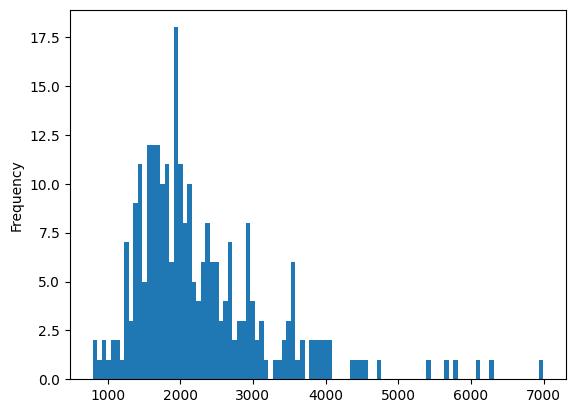

In [27]:
uza.uza_density.plot(kind='hist', bins=100)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ntd_id                       2244 non-null   int64  
 1   legacy_ntdid                 2183 non-null   object 
 2   agency                       2244 non-null   object 
 3   mode                         2244 non-null   object 
 4   tos                          2244 non-null   object 
 5   status                       2244 non-null   object 
 6   reporter_type                2244 non-null   object 
 7   organization_type            2244 non-null   object 
 8   hq_city                      2233 non-null   object 
 9   hq_state                     2244 non-null   object 
 10  uza                          2244 non-null   int64  
 11  uza_name                     2244 non-null   object 
 12  uza_sq_miles                 2244 non-null   int64  
 13  uza_population    

KeyError: 'unlinked_passenger_trips_fy'

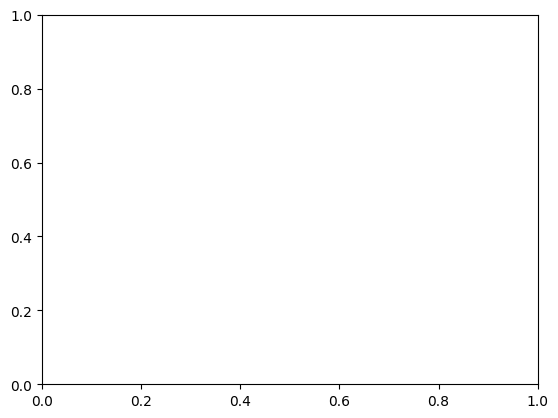

In [29]:
# Create a scatterplot for uza_density and unlinked_passenger_trips_fy
uza.plot.scatter(x='uza_density', y='unlinked_passenger_trips_fy')

In [2]:
# Read 
df = pd.read_excel('https://www.transit.dot.gov/sites/fta.dot.gov/files/2023-03/January%202023%20Raw%20Database_1_0.xlsx', sheet_name='UTP')
df.head()

ValueError: Worksheet named 'UTP' not found

## UPT

In [34]:
upt=pd.read_excel(excel_url, sheet_name=3).clean_names()
upt.head()

,ntd_id,legacy_ntd_id,agency,status,reporter_type,uza,uza_name,mode,tos,2002_01_01_00_00_00,2002_02_01_00_00_00,2002_03_01_00_00_00,2002_04_01_00_00_00,2002_05_01_00_00_00,2002_06_01_00_00_00,2002_07_01_00_00_00,2002_08_01_00_00_00,2002_09_01_00_00_00,2002_10_01_00_00_00,2002_11_01_00_00_00,2002_12_01_00_00_00,2003_01_01_00_00_00,2003_02_01_00_00_00,2003_03_01_00_00_00,2003_04_01_00_00_00,2003_05_01_00_00_00,2003_06_01_00_00_00,2003_07_01_00_00_00,2003_08_01_00_00_00,2003_09_01_00_00_00,2003_10_01_00_00_00,2003_11_01_00_00_00,2003_12_01_00_00_00,2004_01_01_00_00_00,2004_02_01_00_00_00,2004_03_01_00_00_00,2004_04_01_00_00_00,2004_05_01_00_00_00,2004_06_01_00_00_00,2004_07_01_00_00_00,2004_08_01_00_00_00,2004_09_01_00_00_00,2004_10_01_00_00_00,2004_11_01_00_00_00,2004_12_01_00_00_00,2005_01_01_00_00_00,2005_02_01_00_00_00,2005_03_01_00_00_00,2005_04_01_00_00_00,2005_05_01_00_00_00,...,2018_12_01_00_00_00,2019_01_01_00_00_00,2019_02_01_00_00_00,2019_03_01_00_00_00,2019_04_01_00_00_00,2019_05_01_00_00_00,2019_06_01_00_00_00,2019_07_01_00_00_00,2019_08_01_00_00_00,2019_09_01_00_00_00,2019_10_01_00_00_00,2019_11_01_00_00_00,2019_12_01_00_00_00,2020_01_01_00_00_00,2020_02_01_00_00_00,2020_03_01_00_00_00,2020_04_01_00_00_00,2020_05_01_00_00_00,2020_06_01_00_00_00,2020_07_01_00_00_00,2020_08_01_00_00_00,2020_09_01_00_00_00,2020_10_01_00_00_00,2020_11_01_00_00_00,2020_12_01_00_00_00,2021_01_01_00_00_00,2021_02_01_00_00_00,2021_03_01_00_00_00,2021_04_01_00_00_00,2021_05_01_00_00_00,2021_06_01_00_00_00,2021_07_01_00_00_00,2021_08_01_00_00_00,2021_09_01_00_00_00,2021_10_01_00_00_00,2021_11_01_00_00_00,2021_12_01_00_00_00,2022_01_01_00_00_00,2022_02_01_00_00_00,2022_03_01_00_00_00,2022_04_01_00_00_00,2022_05_01_00_00_00,2022_06_01_00_00_00,2022_07_01_00_00_00,2022_08_01_00_00_00,2022_09_01_00_00_00,2022_10_01_00_00_00,2022_11_01_00_00_00,2022_12_01_00_00_00,2023_01_01_00_00_00
0,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,"Seattle, WA",DR,PT,746158.0,656324.0,726578.0,736975.0,746158.0,696633.0,746158.0,747339.0,695451.0,766920.0,696633.0,725396.0,761210.0,697454.0,777948.0,795216.0,787912.0,748855.0,793074.0,754939.0,752394.0,843825.0,701931.0,728026.0,747628.0,771845.0,883913.0,857232.0,841169.0,847193.0,825119.0,820359.0,806457.0,829771.0,895134.0,905623.0,774351.0,753949.0,848372.0,821603.0,886438.0,...,656197.0,722368.0,503211.0,718918.0,741892.0,760626.0,702880.0,749261.0,751070.0,702267.0,789753.0,691308.0,678059.0,597807.0,592710.0,330325.0,259298.0,181764.0,183951.0,336716.0,263311.0,278534.0,364814.0,259950.0,264006.0,257809.0,238318.0,294657.0,298143.0,304492.0,365419.0,376481.0,376779.0,373316.0,390184.0,394087.0,353114.0,348877.0,367249.0,420354.0,410944.0,411898.0,416633.0,402007.0,430553.0,411494.0,421333.0,389118.0,314737.0,427474.0
1,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,"Seattle, WA",DR,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,148118.0,167521.0,109557.0,173830.0,189250.0,184004.0,164778.0,159192.0,148010.0,177490.0,225844.0,181398.0,171530.0,176008.0,194082.0,51980.0,17964.0,34620.0,65413.0,68406.0,61551.0,66462.0,61964.0,56714.0,50086.0,43908.0,52464.0,74402.0,84945.0,85955.0,50120.0,70208.0,81182.0,92135.0,113811.0,102132.0,83695.0,67761.0,76411.0,114449.0,96629.0,95111.0,92116.0,92315.0,101435.0,100325.0,118899.0,119182.0,85426.0,105060.0
2,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,"Seattle, WA",FB,DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3300.0,4648.0,4474.0,4922.0,4760.0,4820.0,4474.0,4976.0,3704.0,4468.0,4664.0,2924.0,3528.0,3532.0,3192.0,3696.0,1568.0,1120.0,2016.0,3676.0,3528.0,3528.0,3576.0,2936.0,3580.0,3192.0,3192.0,3864.0,41

In [37]:
# Select the first 10 columns of the DataFrame
upt.iloc[:, :10].head(5).to_clipboard()